# Zadanie 1 - A.I.

Proces pozyskiwania danych na temat wszystkich kursów dotyczących AI na stronie Pluralsight:
1. Wyszukanie informacji o wszystkich kursach i ściągnięcie wyników jako pojedynczą stronę
2. Pozyskanie wszystkich adresów url kursów powiązanych z AI (przy użyciu BeautifulSoup)
3. Napisanie skryptu w Pythonie (kod poniżej), który odwiedza każdą stronę i pozyskuje niezbędne informacje. W tym przypadku są to: 

  * nazwa kursu
  * autor 
  * poziom trudności
  * ocena
  * ostatnia aktualizacja
  * liczba lekcji
  * czas trwania
  * krótki opis

In [11]:
from requests import get
from bs4 import BeautifulSoup
from time import sleep
from random import randint
from time import time
start_time = time()


In [ ]:
#urls stored in a list
urls = ['https://www.pluralsight.com/courses/ai-executive-briefing', 'https://www.pluralsight.com/courses/microsoft-azure-deploying-ai-solutions', ... ,'https://www.pluralsight.com/courses/ps-live-2018']
      
#empty lists for scrapped data
titles = []
authors = []
levels = []
updates = []
durations = []
descriptions = []
lessons = []
ratings = []

#start time
start_time = time()
requests = 0

for url in urls:
    response = get(url)
    sleep(randint(8,15))
    
    requests += 1
    elapsed_time = time() - start_time
    print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    
    if response.status_code != 200:
        print('status code not 200')

    if requests > 139:
        print('too many requests!')
        break
    
    #scrapping data from Pluralsight and assigning to proper lists
    html_soup = BeautifulSoup(response.text, 'html.parser')
    
    title = html_soup.find('div', class_='title section')
    titles.append(title.h1.text.strip())
    
    author = html_soup.find('h5', class_='title--alternate')
    authors.append(author.a.text)
    
    level = html_soup.find('div', class_='course-info__row--right difficulty-level')
    levels.append(level.get_text().strip())
    
    updated = html_soup.find('div', string='Updated', class_='course-info__row--left')
    updates.append(updated.find_next_sibling("div").get_text().strip())
    
    duration = html_soup.find('div', string='Duration', class_='course-info__row--left')
    durations.append(duration.find_next_sibling("div").get_text().strip())
    
    description = html_soup.find('div', class_='text-component')
    descriptions.append(description.get_text())
    
    lesson = html_soup.find_all('span', class_='accordion-content__row__title')
    lessons.append(len(lesson))
    
    #calculating course rating formula
    rating = html_soup.find('div', class_='course-info__row--right course-info__row--rating')
    if rating:
        rating_full = len(rating.find_all('i', class_='fa fa-star'))
        rating_half = len(rating.find_all('i', class_='fa fa-star-half-o'))
        rating_blank = len(rating.find_all('i', class_='fa fa-star gray'))

        rating_total = rating_full*1 + rating_half*0.5 + rating_blank*0
        ratings.append(rating_total)
        
    else:
        ratings.append('none')
    
    
    print('New item added: ', title.h1.text.strip())

   

Aby uniknąć zbanowania, ustawiłem ograniczenie, które nie wysyła więcej 'requestów' niż 0.1/s. Ściąganie wszystkich danych trwało ok. 15 minut.


Przykładowy output:

*Request:1; Frequency: 0.06407331729335244 requests/s New item added:  AI: Executive Briefing*

*Request:2; Frequency: 0.0833900443281195 requests/s New item added:  Microsoft Azure AI Engineer: Deploying AI Solutions in Microsoft Azure* 

*Request:3; Frequency: 0.08480316174385688 requests/s New item added:  Creating AI with Behavior States in Unreal Engine* 


***

Korzystając z biblioteki 'pandas' porządkuję dane w jednej zbiorczej tabeli i sprawdzam, czy wszystkie rekordy zostały zapisane:

In [21]:
import pandas as pd

data = pd.DataFrame({'Course': titles,'Author': authors,'Level':levels,'Rating':ratings,'Duration':durations,'Lessons':lessons,'Updated':updates,'Description':descriptions})

data.head()

,Course,Author,Level,Rating,Duration,Lessons,Updated,Description
0,AI: Executive Briefing,Simon Allardice,Beginner,5,40m,11,"Feb 11, 2020",Artificial Intelligence (AI) is everywhere—but...
1,Microsoft Azure AI Engineer: Deploying AI Solu...,James Bannan,Beginner,none,2h 21m,24,"Dec 13, 2019",Deploying and configuring AI solutions in Micr...
2,Creating AI with Behavior States in Unreal Engine,Patrick Haslow,Advanced,4.5,6h 19m,46,"Jan 11, 2017",Perceptive AI behavior is a hallmark of a good...
3,Introduction to AI and Navigation Systems in U...,Patrick Haslow,Advanced,4,2h 4m,14,"Aug 3, 2015","In this tutorial, we'll learn how to create fu..."
4,Developing AI Models in Microsoft Azure,Sahil Malik,Intermediate,3.5,1h 31m,25,"May 31, 2019",AI is no longer science fiction or the exclusi...
...,...,...,...,...,...,...,...,...
133,Unity Mobile Game Development: Enemy AI and Wa...,Chris Glick,Advanced,none,6h 25m,44,"Mar 1, 2012","In this series of Unity tutorials, we'll demon..."
134,Unity Mobile Game Development: Final Assembly,Joshua Kinney,Advanced,none,1h 17m,10,"Mar 1, 2012","In this course, we discuss some of the major w..."
135,Animate CC Lip Syncing,Chad Troftgruben,Intermediate,none,3h 48m,56,"Oct 21, 2016",This course shows you how to sync audio to an ...
136,2D Racing Game Series in Unity: Volume 4,Joshua Kinney,Intermediate,none,3h 11m,16,"Sep 23, 2013","In this volume of the 2D Racing Game series, w..."


Na koniec zapisuję dane w formacie **.csv** i importuję do Google Sheets (lub Excella):

In [23]:
data.to_csv('task1.csv')

### Dodatkowe informacje

Lista najlepiej ocenianych kursów dotyczących A.I.

In [67]:
data[(data.Rating == 5.0)]

,Course,Author,Level,Rating,Duration,Lessons,Updated,Description
0,AI: Executive Briefing,Simon Allardice,Beginner,5,40m,11,"Feb 11, 2020",Artificial Intelligence (AI) is everywhere—but...
53,Artificial Intelligence: The Big Picture,Matthew Renze,Beginner,5,1h 15m,37,"Dec 13, 2019",Learn about artificial intelligence and how it...
113,Building Machine Learning Models in SQL Using ...,Janani Ravi,Beginner,5,1h 28m,27,"Nov 20, 2018",BigQuery ML on the Google Cloud Platform democ...
121,Unreal Engine 4 Fundamentals,Rob Brooks,Beginner,5,3h 12m,42,"Jan 25, 2018",The Unreal Engine 4 is a powerful yet versatil...
125,How Machine Learning Works,Paolo Perrotta,Beginner,5,2h 23m,40,"Nov 15, 2019",Machine learning is amazing… and intimidating....


Rozkład, ile średnio lekcji mają kursy dotyczące A.I. na platformie Pluralsight:

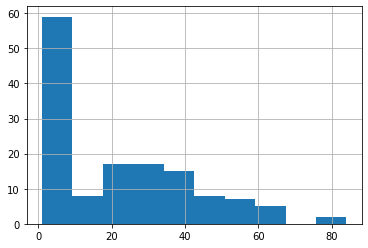

In [68]:
hist = data.Lessons.hist()